# Read in Aethalometer data and calculate AAE: 

Here, we read in the Aeth data and calculate the Absorbing Ångström Exponent. 

We produce the data file for the full time series of the Aethalometer data at 660 nm

it is saved here: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\aethalometer\df_aethalometer_660.dat

this data file is used in the ***compare with Aethalometer*** notebook

***Figure S4***: the trend for the AAE

In [1]:
import sys
sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\Correction_Factors_Absorption')
import Corrections_factors_absorption_functions as fu_cf_abs
%load_ext autoreload
%autoreload 2

loadpath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis'
savepath = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\aethalometer'
savepathplots = r'C:\Users\DominicHeslinRees\Documents\ACP_2023\plots'
Mie = False

import pandas as pd 
import cmocean
import matplotlib.pyplot as plt
import numpy as np
import glob
from datetime import datetime, timedelta
from sklearn import datasets, linear_model
import matplotlib.gridspec as gridspec

In [2]:
def fancy(ax, fontsize=20):    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')        
    # set the fontsize for all your ticks    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)    

# Exaime: 

In [3]:
def load_df(loadpath, extrapath=None, filename=None, formatdata=".dat", index_col=0):
    if extrapath is not None:
        print("loading: "+str(loadpath+'\\'+extrapath+'\\'+filename+formatdata))
        df = pd.read_csv(loadpath+'\\'+extrapath+'\\'+filename+formatdata, index_col=index_col, parse_dates=True,
                         low_memory=False)
    if extrapath is None:
        print("loading: "+str(loadpath+'\\'+filename+formatdata))
        df = pd.read_csv(loadpath+'\\'+filename+formatdata, index_col=index_col, parse_dates=True,
                         low_memory=False)        
    return df

In [4]:
df_abs_2022 = load_df(loadpath=loadpath+'\\absorption\\appended',                   
                       filename='oldpsap_newpsap_maap',)

loading: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\absorption\appended\oldpsap_newpsap_maap.dat


In [5]:
def add_datetime(df):
    df['month'] = df.index%12
    df.loc[df.month == 0, 'month'] = 12
    df['month'] = df['month'].map("{:02}".format)
    df['year'] = (df.index/12).astype(int) + 2002
    df['day'] = "{:02d}".format(1)
    df['datetime'] = df['year'].astype(str)+'-'+df['month'].astype(str)+'-'+df['day'].astype(str)
    df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
    return df

In [6]:
wavelengths = [370, 470, 520, 590, 660, 880, 950]
aeth_columns = ['Conc370', 'Conc470', 'Conc520', 'Conc590', 'Conc660',
                'Conc880', 'Conc950']
MACs = [18.47, 14.54, 13.14, 11.58, 10.35, 7.77, 7.19]
wavelength_to_MAC_dict = dict(zip(wavelengths, MACs))
print(wavelength_to_MAC_dict)

out_path_plot = "C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Data\\processed_data\\plots\\"
Aeth_path = 'C:\\Users\\DominicHeslinRees\\Documents\\ACP_2023\\Data\\Aethalometer\\'

{370: 18.47, 470: 14.54, 520: 13.14, 590: 11.58, 660: 10.35, 880: 7.77, 950: 7.19}


In [7]:
def append_files(EBAS_path, folder_name):
    path = EBAS_path+str(folder_name)
    print(path)
    list_files = glob.glob(path+'\\*')
    print('length: '+str(len(list_files)))
    appended_data = []
    for infile in list_files:
        start_time = infile[len(path)+9:len(path)+17]
        date_time_obj = datetime.strptime(start_time, '%Y%m%d')
        print(date_time_obj)
        try:
            with open(infile) as f:
                lines = f.readlines()
                for value, line in enumerate(lines):
                    if line[0:5] == 'start':
                        skip_value = value
                        break
            df = pd.read_csv(infile, sep='\s+', skiprows=skip_value, header=0)
            df.index = pd.to_datetime(
                df.starttime, unit='D', origin=pd.Timestamp(date_time_obj))
            df.index = df.index.round('s')
            appended_data.append(df)
        except OSError as e:
            print('error')
    appended_data = pd.concat(appended_data)
    return appended_data

- aerosol_absorption_coefficient, 1/Mm, Wavelength=370.0 nm, Statistics=arithmetic mean
- aerosol_absorption_coefficient, 1/Mm, Wavelength=370.0 nm, Statistics=percentile:15.87
- aerosol_absorption_coefficient, 1/Mm, Wavelength=370.0 nm, Statistics=percentile:84.13
- aerosol_absorption_coefficient, 1/Mm, Wavelength=470.0 nm, Statistics=arithmetic mean
- aerosol_absorption_coefficient, 1/Mm, Wavelength=470.0 nm, Statistics=percentile:15.87
- aerosol_absorption_coefficient, 1/Mm, Wavelength=470.0 nm, Statistics=percentile:84.13
- aerosol_absorption_coefficient, 1/Mm, Wavelength=520.0 nm, Statistics=arithmetic mean
- aerosol_absorption_coefficient, 1/Mm, Wavelength=520.0 nm, Statistics=percentile:15.87
- aerosol_absorption_coefficient, 1/Mm, Wavelength=520.0 nm, Statistics=percentile:84.13
- aerosol_absorption_coefficient, 1/Mm, Wavelength=590.0 nm, Statistics=arithmetic mean
- aerosol_absorption_coefficient, 1/Mm, Wavelength=590.0 nm, Statistics=percentile:15.87
- aerosol_absorption_coefficient, 1/Mm, Wavelength=590.0 nm, Statistics=percentile:84.13
- aerosol_absorption_coefficient, 1/Mm, Wavelength=660.0 nm, Statistics=arithmetic mean
- aerosol_absorption_coefficient, 1/Mm, Wavelength=660.0 nm, Statistics=percentile:15.87
- aerosol_absorption_coefficient, 1/Mm, Wavelength=660.0 nm, Statistics=percentile:84.13
- aerosol_absorption_coefficient, 1/Mm, Wavelength=880.0 nm, Statistics=arithmetic mean
- aerosol_absorption_coefficient, 1/Mm, Wavelength=880.0 nm, Statistics=percentile:15.87
- aerosol_absorption_coefficient, 1/Mm, Wavelength=880.0 nm, Statistics=percentile:84.13
- aerosol_absorption_coefficient, 1/Mm, Wavelength=950.0 nm, Statistics=arithmetic mean
- aerosol_absorption_coefficient, 1/Mm, Wavelength=950.0 nm, Statistics=percentile:15.87
- aerosol_absorption_coefficient, 1/Mm, Wavelength=950.0 nm, Statistics=percentile:84.13
- numflag, no unit

In [8]:
df_Magee_EBAS = append_files(Aeth_path, 'Magee')
df_Magee_EBAS.head(2)

C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\Aethalometer\Magee
length: 6
2005-01-01 00:00:00
2006-01-01 00:00:00
2007-01-01 00:00:00
2008-01-01 00:00:00
2009-01-01 00:00:00
2010-01-01 00:00:00


,starttime,endtime,aerosol_absorption_coefficient,aerosol_absorption_coefficient.1,aerosol_absorption_coefficient.2,aerosol_absorption_coefficient.3,aerosol_absorption_coefficient.4,aerosol_absorption_coefficient.5,aerosol_absorption_coefficient.6,aerosol_absorption_coefficient.7,...,flag_aerosol_absorption_coefficient.11,flag_aerosol_absorption_coefficient.12,flag_aerosol_absorption_coefficient.13,flag_aerosol_absorption_coefficient.14,flag_aerosol_absorption_coefficient.15,flag_aerosol_absorption_coefficient.16,flag_aerosol_absorption_coefficient.17,flag_aerosol_absorption_coefficient.18,flag_aerosol_absorption_coefficient.19,flag_aerosol_absorption_coefficient.20
starttime,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,0.000000,0.041667,0.059814,0.062590,0.074531,0.054647,0.055141,0.057263,0.043354,0.046157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00,0.041667,0.083333,0.077307,0.059267,0.073904,0.057757,0.054019,0.057052,0.061017,0.040753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_2005_2010 = df_Magee_EBAS.rename(columns={'aerosol_absorption_coefficient':'abs370_mean',
       'aerosol_absorption_coefficient.1':'abs370_low', 'aerosol_absorption_coefficient.2':'abs370_up',
       'aerosol_absorption_coefficient.3':'abs470_mean', 'aerosol_absorption_coefficient.4':'abs470_up',
       'aerosol_absorption_coefficient.5':'abs470_low', 'aerosol_absorption_coefficient.6':'abs520_mean',
       'aerosol_absorption_coefficient.7':'abs520_low', 'aerosol_absorption_coefficient.8':'abs520_up',
       'aerosol_absorption_coefficient.9':'abs590_mean', 'aerosol_absorption_coefficient.10':'abs590_low',
       'aerosol_absorption_coefficient.11':'abs590_up', 'aerosol_absorption_coefficient.12':'abs660_mean',
       'aerosol_absorption_coefficient.13':'abs660_low', 'aerosol_absorption_coefficient.14':'abs660_up',
       'aerosol_absorption_coefficient.15':'abs880_mean', 'aerosol_absorption_coefficient.16':'abs880_low',
       'aerosol_absorption_coefficient.17':'abs880_up','aerosol_absorption_coefficient.18':'abs950_mean',
       'aerosol_absorption_coefficient.19':'abs950_low','aerosol_absorption_coefficient.20':'abs950_up', 
       'flag_aerosol_absorption_coefficient':'abs370_mean_flag',
       'flag_aerosol_absorption_coefficient.1':'abs370_low_flag',
       'flag_aerosol_absorption_coefficient.2':'abs370_up_flag',
       'flag_aerosol_absorption_coefficient.3':'abs470_mean_flag',
       'flag_aerosol_absorption_coefficient.4':'abs470_low_flag',
       'flag_aerosol_absorption_coefficient.5':'abs470_up_flag',
       'flag_aerosol_absorption_coefficient.6':'abs520_mean_flag',
       'flag_aerosol_absorption_coefficient.7':'abs520_low_flag',
       'flag_aerosol_absorption_coefficient.8':'abs520_up_flag',
       'flag_aerosol_absorption_coefficient.9':'abs590_mean_flag',
       'flag_aerosol_absorption_coefficient.10':'abs590_low_flag',
       'flag_aerosol_absorption_coefficient.11':'abs590_up_flag',
       'flag_aerosol_absorption_coefficient.12':'abs660_mean_flag',
       'flag_aerosol_absorption_coefficient.13':'abs660_low_flag',
       'flag_aerosol_absorption_coefficient.14':'abs660_up_flag',
       'flag_aerosol_absorption_coefficient.15':'abs880_mean_flag',
       'flag_aerosol_absorption_coefficient.16':'abs880_low_flag',
       'flag_aerosol_absorption_coefficient.17':'abs880_up_flag',
       'flag_aerosol_absorption_coefficient.18':'abs950_mean_flag',
       'flag_aerosol_absorption_coefficient.19':'abs950_low_flag',
       'flag_aerosol_absorption_coefficient.20':'abs950_up_flag'})

In [10]:
def alter_column_value(df, var):
    flag = str(var)+'_flag'
    print(df[flag].unique())
    df.loc[df[flag] == 0.999, var] == np.nan
    return df

In [11]:
columns = ['abs370_mean', 'abs370_low', 'abs370_up',
       'abs470_mean', 'abs470_up', 'abs470_mean', 'abs520_mean', 'abs520_low',
       'abs520_up', 'abs590_mean', 'abs590_low', 'abs590_up', 'abs660_mean',
       'abs660_low', 'abs660_up', 'abs880_mean', 'abs880_low', 'abs880_up',
       'abs950_mean', 'abs950_low', 'abs950_up']

In [12]:
for col in columns:
    df_2005_2010 = alter_column_value(df_2005_2010, var=col)

[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]
[  nan 0.    0.392 0.999]


In [13]:
df_2005_2010 = df_2005_2010.replace(99.999999, np.nan)
df_2005_2010 = df_2005_2010[df_2005_2010['flag'] != 0.999].copy()
df_2005_2010 = df_2005_2010[['starttime', 'endtime', 'abs370_mean', 'abs470_mean', 'abs520_mean', 'abs590_mean',
              'abs660_mean', 'abs880_mean', 'abs950_mean']].dropna(how='all')

In [14]:
df_2005_2010.tail(2)

,starttime,endtime,abs370_mean,abs470_mean,abs520_mean,abs590_mean,abs660_mean,abs880_mean,abs950_mean
starttime,,,,,,,,,
2010-12-31 22:00:00,364.916667,364.958333,NaN,NaN,NaN,NaN,NaN,NaN,99.99999
2010-12-31 23:00:00,364.958333,365.000000,NaN,NaN,NaN,NaN,NaN,NaN,99.99999


In [15]:
df_aethalometer_EBAS = append_files(Aeth_path, 'aethalometer')
df_aethalometer_EBAS.head(2)

C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\Aethalometer\aethalometer
length: 10
2011-01-01 00:00:00
2012-01-01 00:00:00
2013-01-01 00:00:00
2014-01-01 00:00:00
2015-01-01 00:00:00
2016-01-01 00:00:00
2017-01-01 00:00:00
2018-01-01 00:00:00
2019-01-01 00:00:00
2020-01-01 00:00:00


,starttime,endtime,aerosol_absorption_coefficient,aerosol_absorption_coefficient.1,aerosol_absorption_coefficient.2,aerosol_absorption_coefficient.3,aerosol_absorption_coefficient.4,aerosol_absorption_coefficient.5,aerosol_absorption_coefficient.6,aerosol_absorption_coefficient.7,...,aerosol_absorption_coefficient.12,aerosol_absorption_coefficient.13,aerosol_absorption_coefficient.14,aerosol_absorption_coefficient.15,aerosol_absorption_coefficient.16,aerosol_absorption_coefficient.17,aerosol_absorption_coefficient.18,aerosol_absorption_coefficient.19,aerosol_absorption_coefficient.20,flag
starttime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,0.000000,0.041667,999999.999999,99999.999999,999999.999999,99999.999999,99999.999999,99999.999999,99999.999999,99999.999999,...,99999.999999,99999.999999,99999.999999,99999.999999,99999.999999,99999.999999,99.999999,99.999999,99.999999,0.999
2011-01-01 01:00:00,0.041667,0.083333,999999.999999,99999.999999,999999.999999,99999.999999,99999.999999,99999.999999,99999.999999,99999.999999,...,99999.999999,99999.999999,99999.999999,99999.999999,99999.999999,99999.999999,99.999999,99.999999,99.999999,0.999


## Kostas

Absorption coefficient

Attenuation

In [16]:
list_files = glob.glob(Aeth_path+"\\*")
print(list_files[0])
file = list_files[0]

xls = pd.ExcelFile(file)
sheet_names = xls.sheet_names
print(sheet_names)

df_Aeth_2011_2015 = pd.read_excel(xls, parse_dates=[2, 3])
df_Aeth_2011_2015.set_index(['start_time.1'], inplace=True)
df_Aeth_2011_2015 = df_Aeth_2011_2015[['start_time', 'end_time', 'Unnamed: 6', 'Conc370', 'Conc470', 'Conc520', 'Conc590',
                                       'Conc660', 'Conc880', 'Conc950', 'Att370', 'Att470', 'Att520', 'Att590',
                                       'Att660', 'Att880', 'Att950']]

C:\Users\DominicHeslinRees\Documents\ACP_2023\Data\Aethalometer\2011-2014 zeppelin 1h flag-filter.xlsx
['Sheet3']


In [17]:
size = len(df_Aeth_2011_2015.columns[2:])
print(size)

def create_subplots(df):
    fig, axs = plt.subplots(3, 5, figsize=(
        20, 10), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace=.5, wspace=.001)
    axs = axs.ravel()
    for i, col in enumerate(df.columns[2:]):
        df[col] = pd.to_numeric(df[col], errors='coerce')
        axs[i].plot(df.index, df[col].values, 'o', ms=1)
        axs[i].set_title(str(col))
    plt.show()
    return fig

15


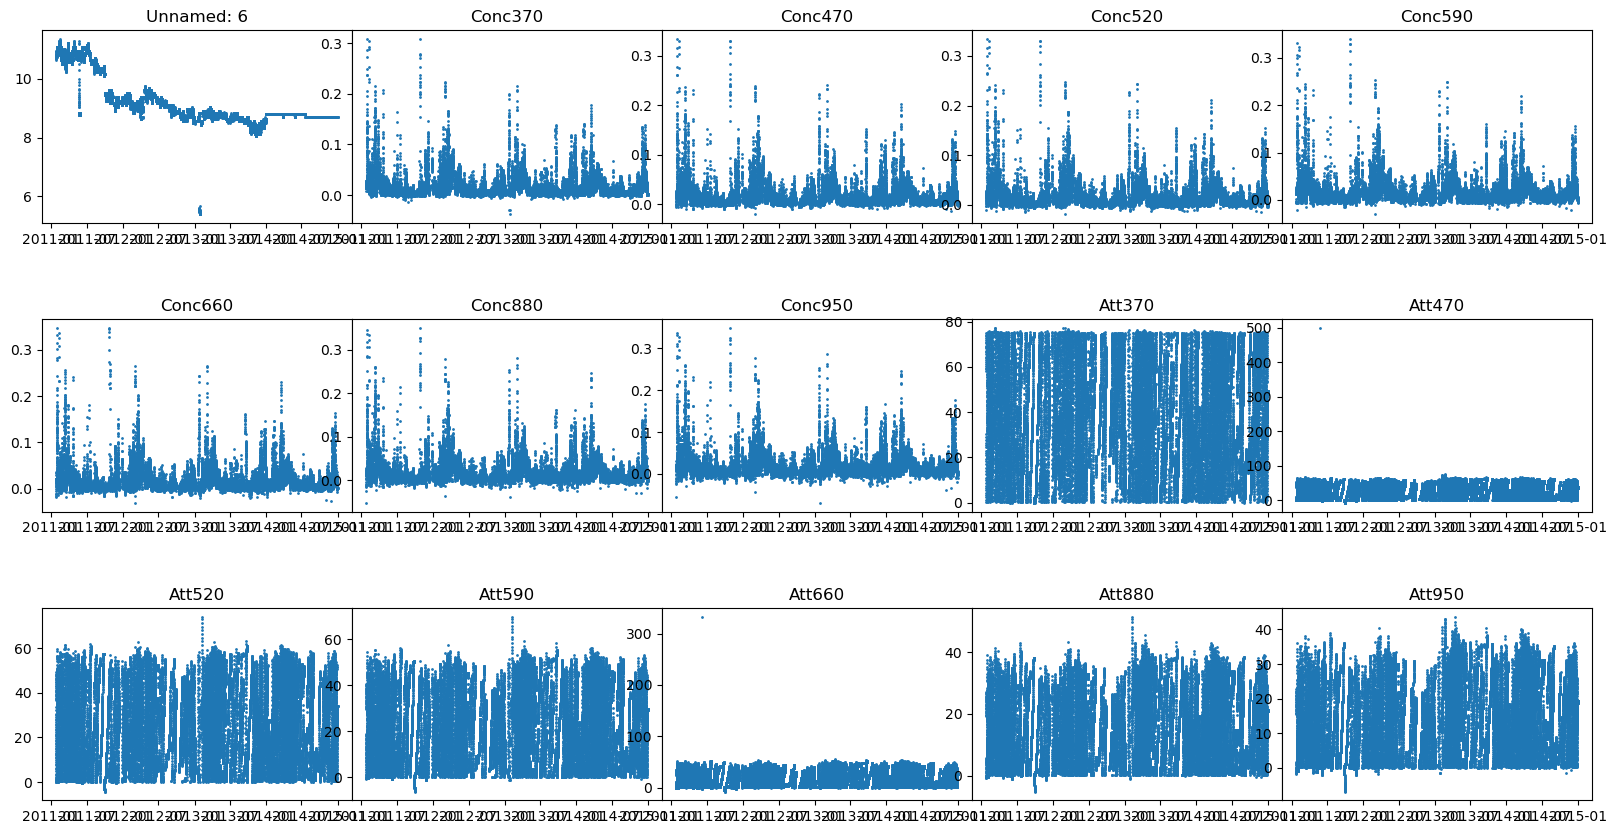

In [18]:
fig = create_subplots(df_Aeth_2011_2015)

In [19]:
file = Aeth_path+'AE31_2015_2019.csv'
df_A31_2015_2019 = pd.read_csv(file, sep=',', header=0, parse_dates=[0]) 
df_A31_2015_2019.set_index(['AE31_starttime'], inplace=True) 

print(df_A31_2015_2019.columns)

df_A31_2015_2019 = df_A31_2015_2019[['AE31_EBC1', 'AE31_EBC2',
       'AE31_EBC3', 'AE31_EBC4', 'AE31_EBC5', 'AE31_EBC6', 'AE31_EBC7']]

df_A31_2015_2019.columns = aeth_columns

df_Aeth_2011_2015 = df_Aeth_2011_2015[['Conc370', 'Conc470', 'Conc520', 'Conc590',
       'Conc660', 'Conc880', 'Conc950']]

Index(['AE31_endtime', 'AE31_st_y', 'AE31_ed_y', 'AE31_EBC1', 'AE31_EBC2',
       'AE31_EBC3', 'AE31_EBC4', 'AE31_EBC5', 'AE31_EBC6', 'AE31_EBC7',
       'AE31_att1', 'AE31_att2', 'AE31_att3', 'AE31_att4', 'AE31_att5',
       'AE31_att6', 'AE31_att7'],
      dtype='object')


In [20]:
aeth_columns

['Conc370', 'Conc470', 'Conc520', 'Conc590', 'Conc660', 'Conc880', 'Conc950']

In [21]:
wavelength_to_MAC_dict

{370: 18.47,
 470: 14.54,
 520: 13.14,
 590: 11.58,
 660: 10.35,
 880: 7.77,
 950: 7.19}

In [22]:
frames = [df_Aeth_2011_2015, df_A31_2015_2019]

df_Aeth_2011_2019 = pd.concat(frames)

for conc_col in ['Conc370', 'Conc470', 'Conc520', 'Conc590', 'Conc660', 'Conc880','Conc950']:
    print(wavelength_to_MAC_dict[int(conc_col[-3:])])
    df_Aeth_2011_2019[conc_col] = df_Aeth_2011_2019[conc_col]*wavelength_to_MAC_dict[int(conc_col[-3:])]

18.47
14.54
13.14
11.58
10.35
7.77
7.19


In [23]:
df_Aeth_2011_2019.index = df_Aeth_2011_2019.index.round("H")        
df_Aeth_2011_2019 = df_Aeth_2011_2019.resample('H').mean() 

Conc520
78888
Conc590
78888
Conc660
78888
Conc880
78888
Conc950
78888


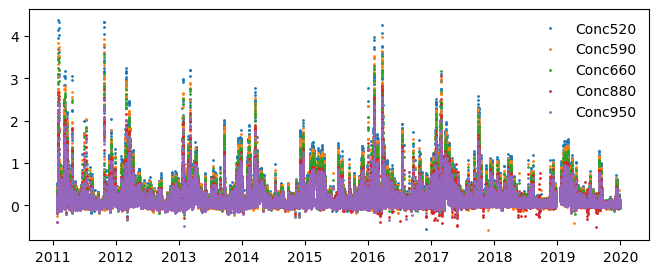

In [24]:
fig, ax = plt.subplots(figsize=(8,3))
for col in df_Aeth_2011_2019.columns[2:]:
    print(col)
    print(len(df_Aeth_2011_2019))
    ax.plot(df_Aeth_2011_2019.index, df_Aeth_2011_2019[col], 'o', label=str(col), ms=1)
plt.legend(frameon=False)
plt.show()

In [25]:
def line_best_fit(x_values,y_values):
    regr = linear_model.LinearRegression()    
    X = np.array(x_values)
    Y = np.array(y_values)
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)    
    regr.fit(X, Y)
    y_pred = regr.predict(X)    
    intercept = "{:.3f}".format(float(regr.intercept_))
    coef = "{:.3f}".format(float(regr.coef_[0]))    
    return intercept, coef, y_pred  

In [26]:
def line_best_fit_weights(x_values,y_values,weights):
    regr = linear_model.LinearRegression()    
    X = np.array(x_values)
    Y = np.array(y_values)
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1, 1)    
    regr.fit(X, Y,  sample_weight=weights)
    y_pred = regr.predict(X)    
    intercept = "{:.3f}".format(float(regr.intercept_))
    coef = "{:.3f}".format(float(regr.coef_[0]))    
    return intercept, coef, y_pred   

In [27]:
for idx in np.arange(0,7,1): 
    df_Aeth_2011_2019['weight'+str(idx+1)] = np.nan  

\begin{equation}
\mathrm{AAE}=-\frac{\ln \left(C_{\mathrm{abs} 1} / C_{\mathrm{abs} 2}\right)}{\ln \left(\lambda_1 / \lambda_2\right)},
\end{equation}

Absorption Ångström exponent represents the wavelength
dependence of the aerosol absorption coefficient. This intensive aerosol optical property depends
on aerosol composition, so different aerosol types have unique ranges of AAE values. AAE is
computed using the following equation:

\begin{equation}
A A E=-\frac{\log \left(\sigma_{a 1}\right)-\log \left(\sigma_{a 2}\right)}{\log \left(\lambda_1\right)-\log \left(\lambda_2\right)}
\end{equation}

In [28]:
AAE520_660 = (np.log(df_Aeth_2011_2019['Conc520'])-np.log(df_Aeth_2011_2019['Conc660']))/(np.log(520)-np.log(660))*(-1)

C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\DominicHeslinRees\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [29]:
AAE520_660 = AAE520_660.to_frame(name='AAE520_660')

In [30]:
AAE520_660

,AAE520_660
2011-01-01 00:00:00,NaN
2011-01-01 01:00:00,NaN
2011-01-01 02:00:00,NaN
2011-01-01 03:00:00,NaN
2011-01-01 04:00:00,NaN
...,...
2019-12-31 19:00:00,0.236369
2019-12-31 20:00:00,1.001105
2019-12-31 21:00:00,0.065144
2019-12-31 22:00:00,1.001105


In [31]:
def remove_inf(df):
    df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
    return df

In [32]:
AAE520_660 = remove_inf(AAE520_660) 

In [33]:
AAE520_660 = AAE520_660.apply(pd.to_numeric)

In [34]:
AAE520_660 = AAE520_660.dropna(how='all')

In [35]:
AAE520_660_M = AAE520_660.resample('M').mean()

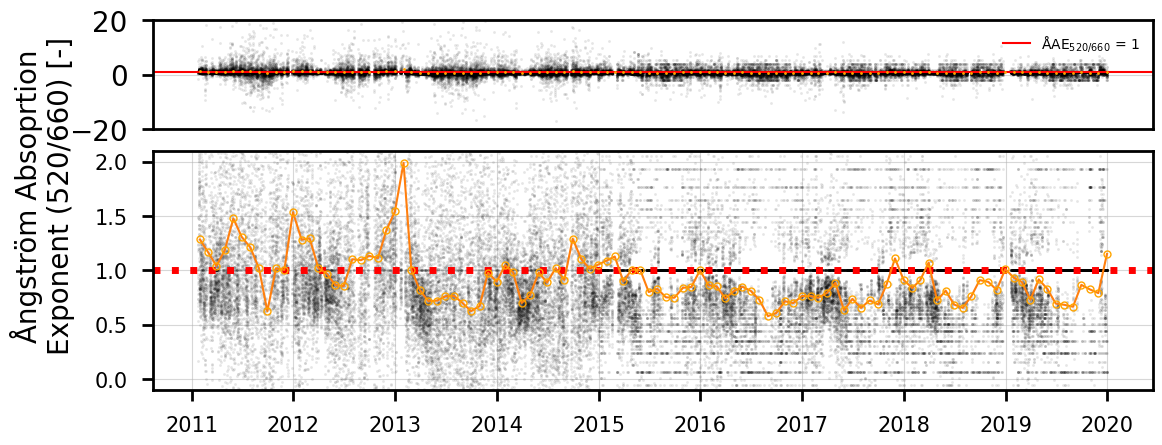

In [36]:
fig = plt.figure(figsize=(10, 5))

gs = gridspec.GridSpec(ncols=1, nrows=4, hspace = 0.2, wspace = 0.2, top = 1,
                           bottom = 0, left = 0, right = 1)

ax = fig.add_subplot(gs[0:1, 0])

ax.plot(AAE520_660.index, AAE520_660.values, 'o', ms=1, mec='k', mfc='None', alpha=0.1)
ax.axhline(y=1, c='r', label='ÅAE$_{520/660}$ = 1')
ax.plot(AAE520_660_M.index, AAE520_660_M.values, 'o', ms=1, mec='orange', mfc='None')
ax.legend(frameon=False, loc=1) 
ax.set_xticks([])
ax.set_ylim(-20, 20)
fancy(ax)

ax = fig.add_subplot(gs[1:3, 0])
ax.plot(AAE520_660.index, AAE520_660.values, 'o', ms=1, mec='k', mfc='None', alpha=0.1)
ax.axhline(y=1, c='r', ls=':', lw=5, label='AAE = 1')
ax.plot(AAE520_660_M.index, AAE520_660_M.values, 'o-', ms=5, mec='orange', mfc='None')
ax.set_ylim(-0.1, 2.1)
fancy(ax, fontsize=15)

ylabel = 'Ångström Absoprtion\nExponent (520/660)'
units='[-]'
fig.text(-0.11, 0.65, ylabel+' '+units, ha='center', va='center', rotation='vertical', fontsize=20)
plt.show()

In [37]:
AAE520_660.mean()

AAE520_660    0.906924
dtype: float64

In [38]:
def calculate_AE(df, aeth_columns, weight):
    index_to_wavelength = zip(np.arange(0,7,1), wavelengths) #index to wavelength e.g. 0 => 370, 1 => 470
    dictionary = dict(index_to_wavelength)
    
    df['n_points'] = df[aeth_columns].notnull().sum(axis = 1)  #minus for start time    

    def f(lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7,
         weight1,weight2,weight3,weight4,weight5,weight6,weight7): 

        values = [x for x in [lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7] if (x > 0)] #values above zero
        index_value = [idx for idx,x in enumerate([lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7]) if (x > 0)]

        weights = [x for x in [weight1,weight2,weight3,weight4,weight5,weight6,weight7]  if (x>0) & (np.isfinite(x)==True)]
        index_weight = [idx for idx,x in enumerate([weight1,weight2,weight3,weight4,weight5,weight6,weight7]) if (x>0) & (np.isfinite(x)==True)]

        index_common = list(set(index_value).intersection(index_weight)) #find the indexes in common => equal number
        coef = np.nan #initialize coef of regression
            
        if weight == False:            
            value_selected = [[lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7][i] for i in index_value] #index_value
            
            if (len(value_selected) > 1): 
                wavelengths = list(map(dictionary.get, index_value)) 
                values_reg = [np.log(value_selected)] #log coefficients
                intercept, coef, y_pred  = line_best_fit(x_values=np.log(wavelengths),y_values=values_reg)

        if weight == True:
            weight_selected = [[weight1,weight2,weight3,weight4,weight5,weight6,weight7][i] for i in index_common]
            value_selected = [[lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7][i] for i in index_value] #index_value

            if (len(value_selected) > 1) & (len(weight_selected) > 1) & (len(weight) <= len(value)):
                wavelengths = list(map(dictionary.get,  index_common)) 
                values_reg = [np.log(value_selected)] #log coefficients
                weights = [1/x for x in weight_selected] #1/weights 
                intercept, coef, y_pred  = line_best_fit(x_values=np.log(wavelengths),y_values=values_reg,weights=weights)

        return coef

    df['AE'] = df.apply(lambda x: f(x['Conc370'], x['Conc470'], x['Conc520'], x['Conc590'], x['Conc660'], x['Conc880'], x['Conc950'],
                                    x['weight1'], x['weight2'], x['weight3'], x['weight4'], x['weight5'], x['weight6'], x['weight7']), axis=1)
    
    df[["AE"]] = df[["AE"]].apply(pd.to_numeric)
    df[["AE"]] = df[["AE"]]*(-1) #BC AAE is typically around 1

    return df

In [39]:
df_Aeth_2011_2019 = calculate_AE(df_Aeth_2011_2019, aeth_columns, weight=False)

In [40]:
df_Aeth_2011_2019.AE.mean()

0.8836397248621127

In [41]:
def plot_AE(df, aeth_columns, wavelengths,idx, weights):
    df = df.dropna(how='all', subset=aeth_columns)    
    plt.figure(figsize=(5,5))    
    log_abs_values = np.log(df[aeth_columns].iloc[idx].values)[::-1] 
    log_wavelengths = np.log(wavelengths)
    print(df[aeth_columns].iloc[idx].values)
    print(log_abs_values)
    print(log_wavelengths)
    if weights == True:
        weights = df.iloc[idx,-8:-1].values     
        plt.errorbar(log_wavelengths, log_abs_values, yerr=weights, fmt='.k',capsize=5);
        weights = [1/x for x in weights]
        print("1/W:")
        print(weights)
        intercept, coef, y_pred = line_best_fit_weights(x_values=log_wavelengths,y_values=log_abs_values, weights=weights)
        plt.plot(log_wavelengths, y_pred, color='blue', linewidth=3,label='LMS weighted fit')         
    if weights == False:
        plt.plot(log_wavelengths, log_abs_values,'o')    
        intercept, coef, y_pred = line_best_fit(x_values=log_wavelengths,y_values=log_abs_values)
        plt.plot(log_wavelengths, y_pred,  '--', color='red', linewidth=3,label='LMS')    
        plt.xlabel('ln ($\lambda$)',fontsize=15)
        plt.ylabel('ln ($\sigma_{\mathrm{ap}}$)',fontsize=15)
        plt.legend()
        print("Coeff: ")
        print(coef)        
    plt.show()    
    return fig

[370, 470, 520, 590, 660, 880, 950]
[1.13306062 1.01179498 0.93843252 0.91184394 0.8055198  0.66163881
 0.5859131 ]
[-0.53458379 -0.41303548 -0.2162675  -0.09228642 -0.06354433  0.01172596
  0.12492248]
[5.91350301 6.15273269 6.25382881 6.38012254 6.49223984 6.77992191
 6.85646198]
Coeff: 
0.670


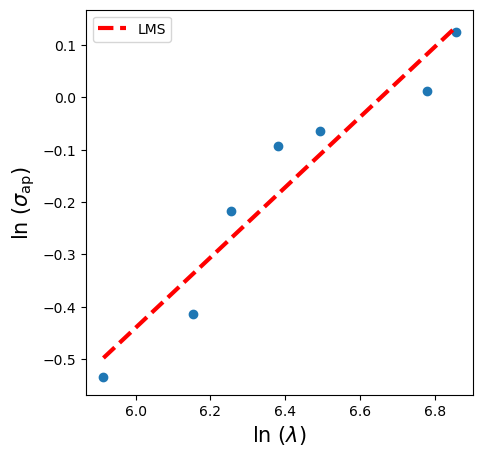

In [42]:
aeth_columns = ['Conc370', 'Conc470', 'Conc520', 'Conc590', 'Conc660',
       'Conc880', 'Conc950']
print(wavelengths)
fig = plot_AE(df_Aeth_2011_2019, aeth_columns, wavelengths, idx=520, weights=False)

[0.44577345 0.3066486  0.26770122 0.2079189  0.17378685 0.13289808
 0.11171822]
[-2.19177547 -2.01817276 -1.74992573 -1.57060718 -1.31788377 -1.18205281
 -0.80794442]
[5.91350301 6.15273269 6.25382881 6.38012254 6.49223984 6.77992191
 6.85646198]
Coeff: 
1.407


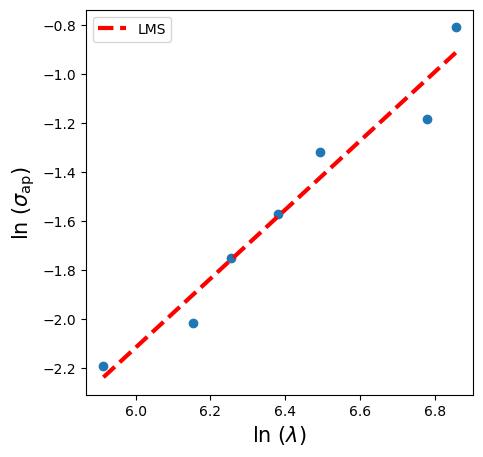

In [43]:
fig = plot_AE(df_Aeth_2011_2019, aeth_columns, wavelengths, idx=56, weights=False)

In [44]:
def plot_fig(monthly_df, lab, ms=1, ax=None):    
    index = monthly_df.iloc[:,0].index
    mean =  monthly_df.iloc[:,0].values
    std = monthly_df.iloc[:,4].values
    ax.plot(index, mean, 'o', label=str(lab), ms=ms, mec='k', mfc='None', alpha=0.8)
    ax.xaxis.set_tick_params(rotation=45)
    ax.set_xlabel('Date', fontsize=20)
    plt.legend(fontsize=15)    
    return ax

In [45]:
idx = df_Aeth_2011_2019.columns.get_loc("AE") 
monthly_aethalometer = df_Aeth_2011_2019.iloc[:,idx].resample("W").agg(['mean', 'median', 'min', 'max', 'std'])

fig, ax = plt.subplots(figsize=(15,4))
plot_fig(monthly_aethalometer, lab = 'Weighted ÅAE', ms=4, ax=ax)
plt.ylabel(r'ÅAE using all wavelengths [-]', fontsize=20)
plt.xlabel(r'', fontsize=20)
ax.axhline(y=1, c='r', ls=':', lw=5, label='AAE = 1')
fancy(ax)
ax.set_ylim(-0.5, 2)
ax.legend(frameon=False, loc=1, fontsize=15)

plt.savefig(out_path_plot+"AAE_all_wavelengths.png", dpi=300,bbox_inches='tight')

### remove flags: 

In [46]:
df_Magee_EBAS = df_Magee_EBAS.drop(['starttime','endtime'], axis=1)
df_aethalometer_EBAS = df_aethalometer_EBAS.drop(['starttime','endtime'], axis=1)
df_aethalometer_EBAS = df_aethalometer_EBAS[df_aethalometer_EBAS.flag == 0]

In [47]:
wavelengths = [370, 470, 520, 590, 660, 880, 950] #nm 
columns = ['370_mean','370_neg_sig','370_pos_sig']
cols = []
for wavelength in wavelengths:
    mean = str(wavelength)+'_mean'
    neg_sig = str(wavelength)+'_neg_sigma'
    pos_sig = str(wavelength)+'_pos_sigma'
    cols.append(mean)
    cols.append(neg_sig)
    cols.append(pos_sig)
cols.append('flag')
df_aethalometer_EBAS.columns = cols

In [48]:
col_flags = []
for col in cols[:-1]:
    col = col + '_flag'
    col_flags.append(col)
cols.extend(col_flags)
df_Magee_EBAS.columns = cols

In [49]:
col_values = [col_flag[:-5] for col_flag in col_flags]
for col_flag in col_flags:     
    col_value = col_flag[:-5]
    df_Magee_EBAS.loc[(~df_Magee_EBAS[col_flag].isin([np.nan, 0])), str(col_value)] = np.nan

In [50]:
df_aethalometer_660_EBAS = df_aethalometer_EBAS.loc[:,['660_mean']].copy()
df_aethalometer_660_EBAS = df_aethalometer_660_EBAS[df_aethalometer_660_EBAS.iloc[:,0].values < 1000]

df_Magee_EBAS = df_Magee_EBAS[df_Magee_EBAS.iloc[:,0].values < 99]
df_Magee_660_EBAS = df_Magee_EBAS.loc[:,['660_mean','660_mean_flag']]
df_Magee_660_EBAS['660_mean_flag'].unique()

array([  nan, 0.   , 0.392, 0.999])

In [51]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [52]:
monthly_aethalometer_EBAS = df_aethalometer_660_EBAS['660_mean'].resample("M").agg(['mean', 'median', 'min', 'max', 'std']) #, percentile(25), percentile(75)]) 
monthly_df_Magee_EBAS = df_Magee_660_EBAS['660_mean'].resample("M").agg(['mean', 'median', 'min', 'max', 'std']) #, percentile(25), percentile(75)])

monthly_df_Aeth_2011_2019 = df_Aeth_2011_2019['Conc660'].resample("M").agg(['mean', 'median', 'min', 'max', 'std']) #, percentile(25), percentile(75)]) 

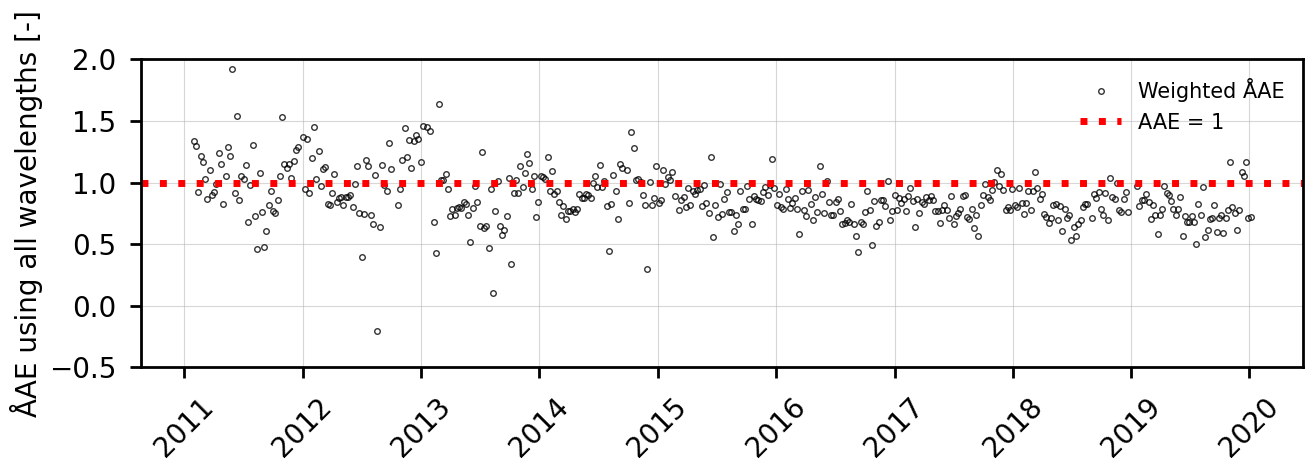

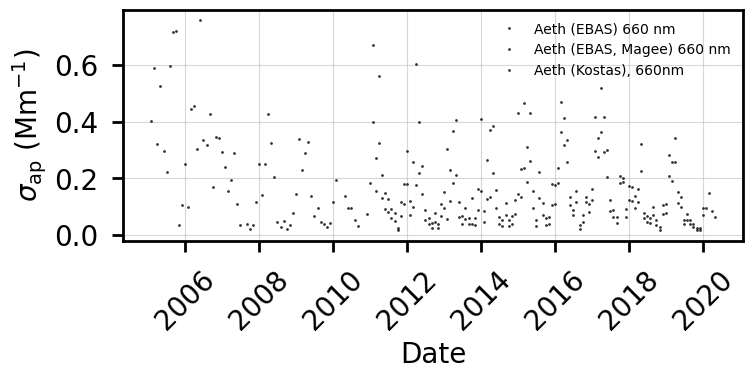

In [53]:
fig, ax = plt.subplots(figsize=(8,3))
plot_fig(monthly_aethalometer_EBAS, lab = 'Aeth (EBAS) 660 nm', ax=ax)
plot_fig(monthly_df_Magee_EBAS, lab = 'Aeth (EBAS, Magee) 660 nm', ax=ax)
plot_fig(monthly_df_Aeth_2011_2019, lab = 'Aeth (Kostas), 660nm', ax=ax)
plt.ylabel(r'$\sigma_{\mathrm{ap}}$ (Mm$^{-1}$)', fontsize=20)
fancy(ax)
plt.legend(frameon=False)
plt.show()

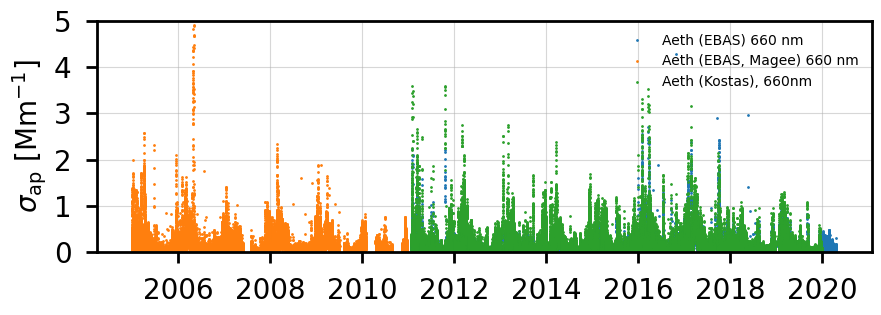

In [54]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(df_aethalometer_660_EBAS.index, df_aethalometer_660_EBAS['660_mean'], 'o', label='Aeth (EBAS) 660 nm', ms=1)
plt.plot(df_Magee_660_EBAS.index, df_Magee_660_EBAS['660_mean'], 'o', label='Aeth (EBAS, Magee) 660 nm', ms=1)
plt.plot(df_Aeth_2011_2019.index, df_Aeth_2011_2019.Conc660, 'o', label='Aeth (Kostas), 660nm', ms=1)
plt.ylim(0,5)
fancy(ax)
plt.ylabel('$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', fontsize=20)
plt.legend(frameon=False, loc=1)
plt.show()

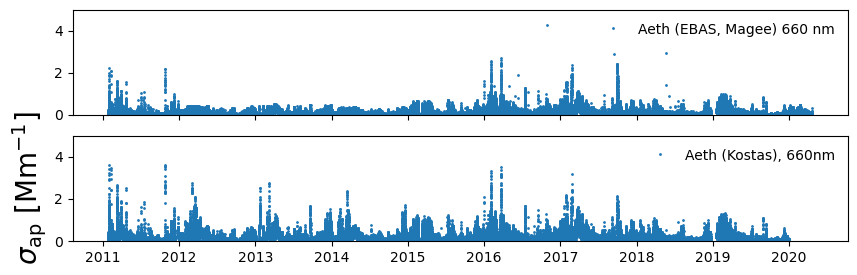

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 3), sharex=True)
ax1.plot(df_aethalometer_660_EBAS.index, df_aethalometer_660_EBAS['660_mean'], 'o', 
         label='Aeth (EBAS, Magee) 660 nm',
         ms=1)
ax1.set_ylim(0,5)
ax2.plot(df_Aeth_2011_2019.index, df_Aeth_2011_2019.Conc660, 'o', label='Aeth (Kostas), 660nm', 
         ms=1)
ax2.set_ylim(0,5)
fancy(ax)
plt.ylabel('$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', fontsize=20)
ax1.legend(frameon=False, loc=1)
ax2.legend(frameon=False, loc=1)
plt.show()

In [56]:
def add_weights(df):
    for idx in np.arange(0,7,1):  
        df['weight'+str(idx+1)] = np.nan  
        df['weight'+str(idx+1)] = (((df.iloc[:,idx*3] - df.iloc[:,idx*3+1])*(df.iloc[:,idx*3+2] - df.iloc[:,idx*3])).pow(1./2))/(df.iloc[:,idx*3])
    return df

# Concat: 

In [57]:
df_Magee_EBAS = df_Magee_EBAS[col_values]
df_aethalometer_EBAS = df_aethalometer_EBAS[col_values]

frames = [df_aethalometer_EBAS, df_Magee_EBAS]

df_aethalometer_EBAS = pd.concat(frames)
df_aethalometer_EBAS = df_aethalometer_EBAS.sort_index()
df_aethalometer_EBAS = add_weights(df_aethalometer_EBAS)

In [58]:
df_aethalometer_EBAS.rename(columns=dict(zip(col_values[::3], aeth_columns)), inplace=True)

In [59]:
df_aethalometer_EBAS = calculate_AE(df_aethalometer_EBAS, aeth_columns, weight=False)
print(df_aethalometer_EBAS['AE'].mean())

0.9435753443105627


In [60]:
df_aethalometer_EBAS['AE'] = df_aethalometer_EBAS['AE'].fillna(1)

[1.5405   1.350629 1.260486 1.137257 1.071943 0.8466   0.7942  ]
[-0.23041996 -0.16652695  0.06947289  0.12861922  0.23149736  0.30057041
  0.43210704]
[5.91350301 6.15273269 6.25382881 6.38012254 6.49223984 6.77992191
 6.85646198]
Coeff: 
0.691


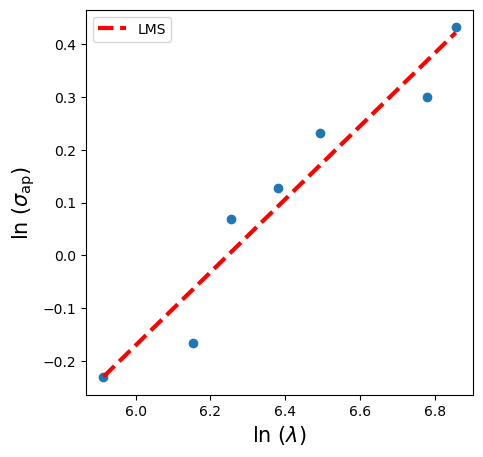

In [61]:
fig = plot_AE(df_aethalometer_EBAS, aeth_columns, wavelengths, idx=58, weights=False)

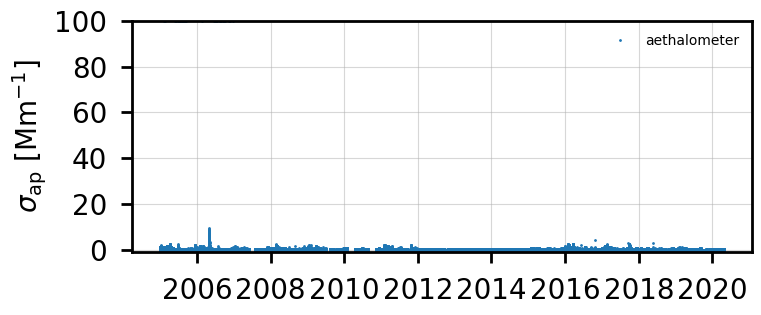

In [62]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(df_aethalometer_EBAS.index, df_aethalometer_EBAS['Conc660'], 'o', label='aethalometer', ms=1)
plt.ylabel('$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', fontsize=20)
plt.ylim(-1,100)
fancy(ax)
plt.legend(frameon=False)
plt.show()

In [63]:
df_aethalometer_EBAS = df_aethalometer_EBAS[df_aethalometer_EBAS['Conc660'] < 99]

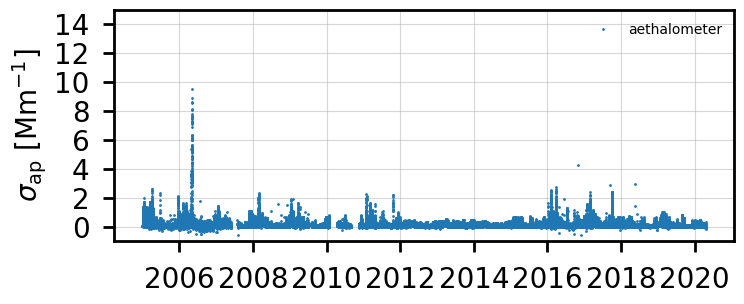

In [64]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(df_aethalometer_EBAS.index, df_aethalometer_EBAS['Conc660'], 'o', label='aethalometer', ms=1)
ax.set_ylabel(r'abs', fontsize=20)
plt.ylim(-1,15)
plt.ylabel('$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', fontsize=20)
fancy(ax)
plt.legend(frameon=False)
plt.show()

In [65]:
def q25(x, percentile=0.25):
    return x.quantile(percentile)

def q75(x):
    return x.quantile(0.75) 

def monthly(df, var='abs637', start_year=2002):
    df = df.copy()
    df.index = pd.to_datetime(df.index)
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['month_year'] = (df.index.year-start_year)*12 + df.index.month
    df_month = df.groupby('month_year')[var].agg(['mean', 'median', 'min', 'max', 'std', q25, q75])
    return df_month

In [66]:
df_aethalometer_EBAS.head(2)

,Conc370,370_neg_sigma,370_pos_sigma,Conc470,470_neg_sigma,470_pos_sigma,Conc520,520_neg_sigma,520_pos_sigma,Conc590,...,950_pos_sigma,weight1,weight2,weight3,weight4,weight5,weight6,weight7,n_points,AE
starttime,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,0.059814,0.062590,0.074531,0.054647,0.055141,0.057263,0.043354,0.046157,0.058214,0.041097,...,0.03388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0.865
2005-01-01 01:00:00,0.077307,0.059267,0.073904,0.057757,0.054019,0.057052,0.061017,0.040753,0.057195,0.048537,...,0.03231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,0.832


In [67]:
df_aeth_EBAS = monthly(df_aethalometer_EBAS, var='Conc660')

In [68]:
df_aeth_EBAS.head(2)

,mean,median,min,max,std,q25,q75
month_year,,,,,,,
37,0.402361,0.263229,-0.022834,1.985314,0.375529,0.123528,0.602571
38,0.292166,0.212803,-0.048523,1.341514,0.291900,0.079603,0.402771


In [69]:
df_aeth_EBAS = add_datetime(df_aeth_EBAS)

In [70]:
df_aeth_EBAS.head(2)

,mean,median,min,max,std,q25,q75,month,year,day,datetime
month_year,,,,,,,,,,,
37,0.402361,0.263229,-0.022834,1.985314,0.375529,0.123528,0.602571,01,2005,01,2005-01-01
38,0.292166,0.212803,-0.048523,1.341514,0.291900,0.079603,0.402771,02,2005,01,2005-02-01


In [71]:
df_aeth_EBAS = df_aeth_EBAS.set_index('datetime')

In [72]:
def quick_month_plot(df, display_label=False, fmt="o", color='k',
                    mfc='green', mec='k', ecolor='black', linecolour='k',
                    ms=1, label='', ax=None):
    df = df.sort_index()
    quan_25 = df['q25'].values
    quan_75 = df['q75'].values
    index = df.index
    mean =  df['mean'].values
    median =  df['median'].values
    if display_label==True:
        error_label='Med + 25$^{\mathrm{th}}$ - 75$^{\mathrm{th}}$'
    if display_label==False:  
        error_label='_'        
    ax.errorbar(index, median, yerr=[median-quan_25, quan_75-median], fmt=fmt, capsize=5, color=color, 
                mfc=mfc, ecolor=ecolor, ms=ms, label=error_label)
    ax.plot(index, median, label='', color=color, ls=':')
    ax.plot(index, mean, 'x', label=label, color=color, ms=ms) 
    fancy(ax)
    ax.set_ylabel('')
    ax.legend(frameon=False, fontsize=15, loc=1)
    
    alpha = .1
    face_color1 = 'b'
    face_color2 = 'g'
    ax.axvspan('2012-11-19 14:00:00', '2013-03-21 14:00:00', alpha= alpha, color=face_color1)
    ax.axvspan('2014-11-19 14:00:00', '2016-10-13 14:00:00', alpha= alpha, color=face_color2)
    
    return ax

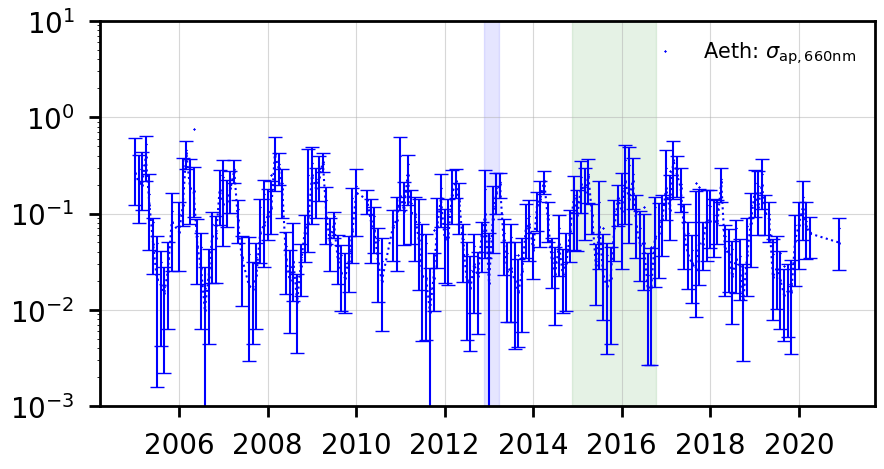

In [73]:
fig, ax = plt.subplots(figsize=(10,5))
quick_month_plot(df_aeth_EBAS, label='Aeth: $\sigma_{\mathrm{ap, 660nm}}$', 
                color='b', mfc='b', mec='b', 
                ecolor='b', linecolour='b', ax=ax)
plt.ylim(10**(-3),10)
plt.yscale('log')
plt.show()

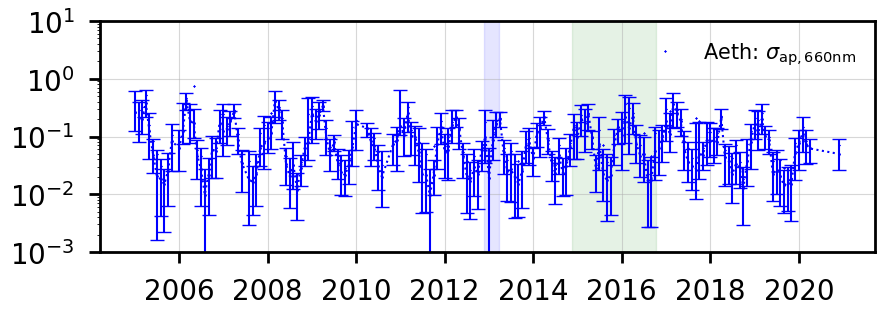

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(10,3), sharex=True, sharey=True)
quick_month_plot(df_aeth_EBAS, label='Aeth: $\sigma_{\mathrm{ap, 660nm}}$', 
                color='b', mfc='b', mec='b', 
                ecolor='b', linecolour='b', ax=ax)
plt.ylim(10**(-3),10)
plt.yscale('log')
plt.show()

# Append: 

In [75]:
df_Magee_EBAS = df_Magee_EBAS[col_values]

df_Aeth_2011_2019_660 = df_Aeth_2011_2019[['Conc660']].rename(columns={'Conc660':'660_mean'})

frames = [df_Magee_EBAS[['660_mean']], df_Aeth_2011_2019_660]

df_aethalometer_merged = pd.concat(frames)
df_aethalometer_merged = df_aethalometer_merged.sort_index()

In [76]:
df_aethalometer_merged

,660_mean
2005-01-01 00:00:00,0.039960
2005-01-01 01:00:00,0.043131
2005-01-01 02:00:00,0.030763
2005-01-01 03:00:00,0.041863
2005-01-01 04:00:00,0.046937
...,...
2019-12-31 19:00:00,0.062100
2019-12-31 20:00:00,0.051750
2019-12-31 21:00:00,0.051750
2019-12-31 22:00:00,0.010350


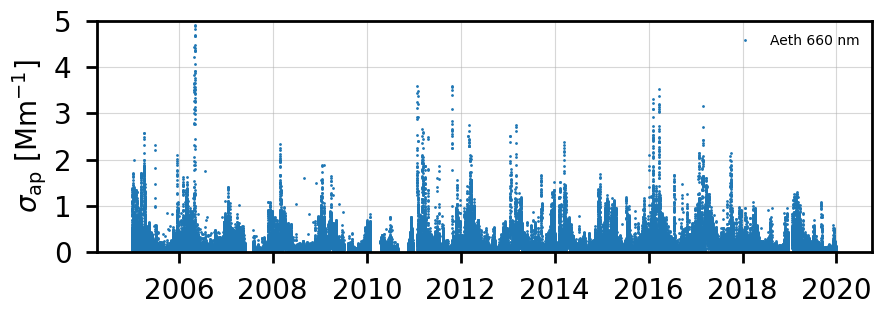

In [77]:
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(df_aethalometer_merged.index, df_aethalometer_merged['660_mean'], 'o', label='Aeth 660 nm',
         ms=1)
plt.ylim(0,5)
fancy(ax)
plt.ylabel('$\sigma_{\mathrm{ap}}$ [Mm$^{-1}$]', fontsize=20)
plt.legend(frameon=False, loc=1)
plt.show()

# Data file for the Aethalometer: 

In [79]:
fu_cf_abs.save_df(df_aethalometer_merged,savepath, 
                  name='df_aethalometer_660')

Save as: C:\Users\DominicHeslinRees\Documents\ACP_2023\Analysis\aethalometer\df_aethalometer_660.dat


# AAE 2005 - 2011: 

In [80]:
def calculate_AE(df, aeth_columns, weight, wavelengths):
    index_to_wavelength = zip(np.arange(0,7,1), wavelengths) #index to wavelength e.g. 0 => 370, 1 => 470
    dictionary = dict(index_to_wavelength)
    print(dictionary)    
    df['n_points'] = df[aeth_columns].notnull().sum(axis = 1)  #minus for start time   

    def f(lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7,
         weight1=None,weight2=None,weight3=None,weight4=None,weight5=None,weight6=None,weight7=None): 

        values = [x for x in [lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7] if (x > 0)] #values above zero
        index_value = [idx for idx,x in enumerate([lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7]) if (x > 0)]

        coef = np.nan #initialize coef of regression
            
        if weight == False:            
            value_selected = [[lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7][i] for i in index_value] #index_value
            
            if (len(value_selected) > 1): 
                wavelengths = list(map(dictionary.get, index_value)) 
                values_reg = [np.log(value_selected)] #log coefficients
                intercept, coef, y_pred  = line_best_fit(x_values=np.log(wavelengths),y_values=values_reg)

        if weight == True:
            weights = [x for x in [weight1,weight2,weight3,weight4,weight5,weight6,weight7]  if (x>0) & (np.isfinite(x)==True)]
            index_weight = [idx for idx,x in enumerate([weight1,weight2,weight3,weight4,weight5,weight6,weight7]) if (x>0) & (np.isfinite(x)==True)]
            index_common = list(set(index_value).intersection(index_weight)) #find the indexes in common => equal number
            
            weight_selected = [[weight1,weight2,weight3,weight4,weight5,weight6,weight7][i] for i in index_common]
            value_selected = [[lambda1,lambda2,lambda3,lambda4,lambda5,lambda6,lambda7][i] for i in index_value] #index_value

            if (len(value_selected) > 1) & (len(weight_selected) > 1) & (len(weight) <= len(value)):
                wavelengths = list(map(dictionary.get,  index_common)) 
                values_reg = [np.log(value_selected)] #log coefficients
                weights = [1/x for x in weight_selected] #1/weights 
                intercept, coef, y_pred  = line_best_fit(x_values=np.log(wavelengths),y_values=values_reg,weights=weights)

        return coef

    if weight == True:
        df['AE'] = df.apply(lambda x: f(x[aeth_columns[0]], x[aeth_columns[1]], x[aeth_columns[2]], x[aeth_columns[3]], 
                                        x[aeth_columns[4]], x[aeth_columns[5]], x[aeth_columns[6]],
                                    x['weight1'], x['weight2'], x['weight3'], x['weight4'], x['weight5'], x['weight6'], x['weight7']), axis=1)
    if weight == False:
        df['AE'] = df.apply(lambda x: f(x[aeth_columns[0]], x[aeth_columns[1]], x[aeth_columns[2]], x[aeth_columns[3]], 
                                        x[aeth_columns[4]], x[aeth_columns[5]], x[aeth_columns[6]]), axis=1)
    
    df[["AE"]] = df[["AE"]].apply(pd.to_numeric)
    df[["AE"]] = df[["AE"]]*(-1) #BC AAE is typically around 1

    return df

In [81]:
df_2005_2010_AE = calculate_AE(df_2005_2010, 
                             aeth_columns=['abs370_mean', 'abs470_mean', 'abs520_mean',
                                           'abs590_mean', 'abs660_mean', 'abs880_mean', 'abs950_mean'], 
                             wavelengths = [370, 470, 520, 590, 660, 880, 950], 
                             weight=False)

{0: 370, 1: 470, 2: 520, 3: 590, 4: 660, 5: 880, 6: 950}


In [82]:
def AE_weekly(df):
    idx = df.columns.get_loc("AE") 
    monthly_aethalometer = df.iloc[:,idx].resample("W").agg(['mean', 'median', 'min', 'max', 'std'])
    fig, ax = plt.subplots(figsize=(15,4))
    plot_fig(monthly_aethalometer, lab = 'Weighted ÅAE', ms=4, ax=ax)
    plt.ylabel(r'ÅAE using all wavelengths [-]', fontsize=20)
    plt.xlabel(r'', fontsize=20)
    ax.axhline(y=1, c='r', ls=':', lw=5, label='AAE = 1')
    fancy(ax)
    ax.set_ylim(-0.5, 2)
    ax.legend(frameon=False, loc=1, fontsize=15)
    plt.show()

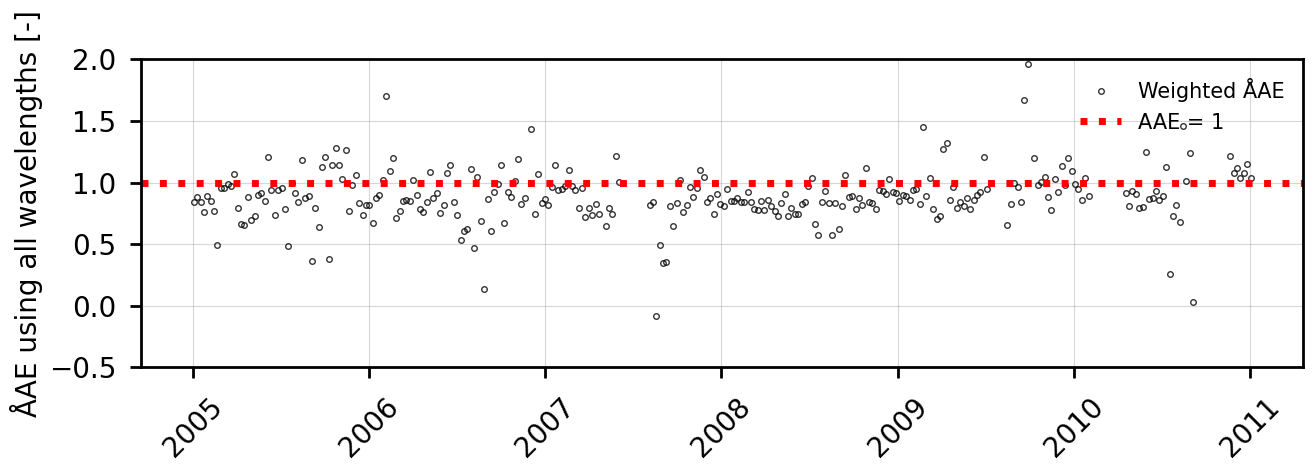

In [83]:
AE_weekly(df_2005_2010_AE)

## concat the two AAE: 

In [84]:
df = pd.concat([df_2005_2010_AE[['AE']],df_Aeth_2011_2019[['AE']]], axis=0)

In [85]:
df.head(2)

,AE
2005-01-01 00:00:00,0.865
2005-01-01 01:00:00,0.832


# Trend in AAE: 

In [86]:
import sys

sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\Trends')
import trends_functions as fu_trends
sys.path.append(r'C:\Users\DominicHeslinRees\Documents\ACP_2023\scripts\functions_backtrajectories')
import functions_backtrajectories as fu_backtraj

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.gridspec as gridspec
import mannkendall as mk

from datetime import datetime, timedelta
import numpy as np

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
df = df.resample('H').median()
df = df[['AE']].dropna(how='all')

In [88]:
df.head(2)

,AE
2005-01-01 00:00:00,0.865
2005-01-01 01:00:00,0.832


In [89]:
df.tail(2)

,AE
2019-12-31 22:00:00,2.140
2019-12-31 23:00:00,0.355


In [90]:
df = fu_trends.slice_df(df, start_datetime='2004-12-31') #'2006-05-05' fire
first_season = fu_trends.get_first_season(df)        
season_to_season_num = fu_trends.get_full_season_abb_years(start_year=2011, number_years=2020-2005, first_season=first_season)
season_num_to_season = fu_trends.reverse_dict(season_to_season_num)

SBU
2011


In [91]:
df = fu_trends.prepare_data(df, dict_season_num_to_season=season_num_to_season)

start date inserted: 2005-01-01
Note: the slow build-up season crosses over two years as it goes from October-January, so the year corresponds to previous year
Number of unique seasons: 46
full_season_to_season_num given


In [92]:
def thickax(ax, fontsize=12, linewidth=4):
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2.5)
    plt.rc('axes', linewidth=linewidth)
    ax = plt.gca()
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    ax.tick_params(direction='out', length=12, width=4, pad=12, bottom=True, top=False, left=True, right=False)    
    
def fancy(ax, fontsize=20, spines=['top','bottom','left','right'], alpha=0.5):    
    # thickning the axes spines
    for axis in spines:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')        
    # set the fontsize for all your ticks    
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')    
    # add a grid to the plot
    ax.grid(True, alpha=alpha)  
    
def sf(sf_num):
    sf = '{0:.'+str(sf_num)+'f}' #2 digits of precision and f is used to represent floating point number.
    return sf

def add_year_month_ordinal(df):   
    df['timestamp'] = pd.to_datetime(df.index)
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year    
    df['year_num'] = df['year'] - df['year'].iloc[0]
    df['month_ordinal'] = df['year_num']*12 + df['month']
    df['year_num'] = df['year_num'] + 1
    return df
    
def create_month_season_numbers(df, full_season_to_season_num=None):
    start_year = df.index.year[0]
    end_year = df.index.year[-1]
    number_years = end_year - start_year #len(df.index.year.unique())+1        
    df.loc[:,'month_num'] = df.index.month
    df.loc[:,'year'] = df.index.year        
    df.loc[:,'season_abb'] = df.month_num.map(month_to_season).values
    df['season_name'] = df['season_abb'].map(abb_to_name)      
    df.loc[:, "season_abb_year"] = df["season_abb"].astype(str) + '_' +df.index.year.astype(str)
    #print("Note: the slow build-up season crosses over two years as it goes from October-January, so the year corresponds to previous year")
    df.loc[(df['season_abb'] == 'SBU') & (df['month_num'] == 1),  "season_abb_year"] = df.loc[(df['season_abb'] == 'SBU') & (df['month_num'] == 1),  "season_abb_year"].apply(lambda x: x[:-4]+str(int(x[-4:])-1))
    seasons = df.season_abb_year.unique()
    #print("Number of unique seasons: "+str(len(seasons)))    
    seasons_num = np.arange(1,len(seasons)+1,1)
    season_to_season_num = dict(zip(seasons, seasons_num))
    df.loc[:,'season_ordinal'] = df['season_abb_year'].map(season_to_season_num)    
    df = df.sort_index()
    return df

def convert_season_add_year_to_datetime(season_abb_year):
    year = str(season_abb_year)[-4:]
    season_abb = str(season_abb_year)[:3] 
    if season_abb == 'AHZ':
        start = year+'-02-'+'01'
        stop = year+'-05-'+'31'
    if season_abb == 'SUM':
        start = year+'-06-'+'01'
        stop = year+'-09-'+'30'
    if season_abb == 'SBU':
        start = year+'-10-'+'01'
        stop = str(int(year)+1)+'-01-'+'31'
    start = pd.to_datetime(start)
    stop = pd.to_datetime(stop)
    return start, stop

def mid_datetime_function(a, b):
    return a + (b - a)/2

def add_mid_datetime_using_dictionary(df, season_num_to_season):
    df['season_abb_year'] = df.index.map(season_num_to_season)
    df['start'] = df['season_abb_year'].apply(lambda x: convert_season_add_year_to_datetime(x)[0])
    df['stop'] = df['season_abb_year'].apply(lambda x: convert_season_add_year_to_datetime(x)[1])
    df['mid_datetime'] = df.apply(lambda x: mid_datetime_function(x.start, x.stop), axis=1)
    return df

In [93]:
def add_year_month_ordinal(df):   
    df['timestamp'] = pd.to_datetime(df.index)
    df['day'] = df['timestamp'].dt.day
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year    
    df['year_num'] = df['year'] - df['year'].iloc[0]
    df['month_ordinal'] = df['year_num']*12 + df['month']
    df['year_num'] = df['year_num'] + 1
    return df
    
def create_month_season_numbers(df, full_season_to_season_num=None):
    start_year = df.index.year[0]
    end_year = df.index.year[-1]
    number_years = end_year - start_year #len(df.index.year.unique())+1        
    df.loc[:,'month_num'] = df.index.month
    df.loc[:,'year'] = df.index.year        
    df.loc[:,'season_abb'] = df.month_num.map(month_to_season).values
    df['season_name'] = df['season_abb'].map(abb_to_name)      
    df.loc[:, "season_abb_year"] = df["season_abb"].astype(str) + '_' +df.index.year.astype(str)
    #print("Note: the slow build-up season crosses over two years as it goes from October-January, so the year corresponds to previous year")
    df.loc[(df['season_abb'] == 'SBU') & (df['month_num'] == 1),  "season_abb_year"] = df.loc[(df['season_abb'] == 'SBU') & (df['month_num'] == 1),  "season_abb_year"].apply(lambda x: x[:-4]+str(int(x[-4:])-1))
    seasons = df.season_abb_year.unique()
    #print("Number of unique seasons: "+str(len(seasons)))    
    seasons_num = np.arange(1,len(seasons)+1,1)
    season_to_season_num = dict(zip(seasons, seasons_num))
    df.loc[:,'season_ordinal'] = df['season_abb_year'].map(season_to_season_num)    
    df = df.sort_index()
    return df

def convert_season_add_year_to_datetime(season_abb_year):
    year = str(season_abb_year)[-4:]
    season_abb = str(season_abb_year)[:3] 
    if season_abb == 'AHZ':
        start = year+'-02-'+'01'
        stop = year+'-05-'+'31'
    if season_abb == 'SUM':
        start = year+'-06-'+'01'
        stop = year+'-09-'+'30'
    if season_abb == 'SBU':
        start = year+'-10-'+'01'
        stop = str(int(year)+1)+'-01-'+'31'
    start = pd.to_datetime(start)
    stop = pd.to_datetime(stop)
    return start, stop

def mid_datetime_function(a, b):
    return a + (b - a)/2

def add_mid_datetime_using_dictionary(df, season_num_to_season):
    df['season_abb_year'] = df.index.map(season_num_to_season)
    df['start'] = df['season_abb_year'].apply(lambda x: convert_season_add_year_to_datetime(x)[0])
    df['stop'] = df['season_abb_year'].apply(lambda x: convert_season_add_year_to_datetime(x)[1])
    df['mid_datetime'] = df.apply(lambda x: mid_datetime_function(x.start, x.stop), axis=1)
    return df

def convert_to_datetime(x):
    x_datetime = datetime(pd.to_datetime(x).year, pd.to_datetime(x).month, pd.to_datetime(x).day)
    return x_datetime

def normal_mk_test(df_days, var='abs637', resolution=0.001):
    y0 = convert_to_datetime(df_days.index[0])
    multi_obs_dts = np.array([y0+timedelta(days=item) for item in range(len(df_days.index))])
    multi_obs = df_days[var].values #np.array(df_days.values)
    print(len(multi_obs_dts))
    print(len(multi_obs))
    #decimal places or accuracy => 2dp 
    out = mk.mk_temp_aggr(multi_obs_dts, multi_obs, resolution=resolution) #resolution?? 1/24 hourly/daily?? 
    print(out[0])
    return out

def get_relative_trend(out, df_days):
    return out[0]['slope']/df_days.median()*100

def get_dict_of_season_dfs(df):
    df = df.copy()
    if 'season' not in df.columns:
        df['season'] = df['season_abb_year'].apply(lambda x: str(x)[:3])
    df_AHZ = df[df['season'] == 'AHZ']
    df_SUM = df[df['season'] == 'SUM']
    df_SBU = df[df['season'] == 'SBU']
    dict_season_to_df = {'AHZ':df_AHZ, 'SUM':df_SUM, 'SBU':df_SBU}
    return dict_season_to_df

def get_seasonal_trend_output(dict_season_to_df, var='abs637', resolution=0.001, pw_method='3pw', alpha_xhomo=80):
    if var == 'tp_era5':
        resolution = 0.1 #decimal places
    
    df_AHZ, df_SUM, df_SBU = [*dict_season_to_df.values()][0], [*dict_season_to_df.values()][1], [*dict_season_to_df.values()][2]
    multi_obs = [df_AHZ[var].values, df_SUM[var].values, df_SBU[var].values]
    multi_obs_dts = [np.array([convert_to_datetime(x) for x in df_AHZ.index]),
                     np.array([convert_to_datetime(x) for x in df_SUM.index]), 
                     np.array([convert_to_datetime(x) for x in df_SBU.index])]
    # Process it
    out = mk.mk_temp_aggr(multi_obs_dts, multi_obs, resolution=resolution, pw_method=pw_method, 
                          alpha_xhomo=alpha_xhomo)

    n_season = 3
    # Print the results
    for n in range(n_season):
        print('Season {ind}:'.format(ind=n+1), out[n])
    print('Combined yearly trend:', out[n_season])
    return out

def produce_table(out):
    parameters = ['p', 'ss', 'slope', 'ucl', 'lcl']
    print(parameters)
    df_stats_table = pd.DataFrame(columns=parameters, dtype=np.float64)
    seasons = ['AHZ', 'SUM', 'SBU', 'combined'] #needs to be correct order
    for season_n, season_name in enumerate(seasons):
        print(season_name)
        for parameter in parameters:
            print(out[season_n][parameter])
            df_stats_table.loc[season_name, parameter] = out[season_n][parameter]
    return df_stats_table

def add_seasons_to_daily(df_days):
    month_to_season =  { 1:'SBU',  2:'AHZ', 3:'AHZ',  
                     4:'AHZ',  5:'AHZ', 6:'SUM',  7:'SUM',  8:'SUM', 9:'SUM', 10:'SBU', 
                     11:'SBU', 12:'SBU'}  

    df_days.loc[:,'month_num'] = df_days.index.month
    df_days.loc[:,'year'] = df_days.index.year        
    df_days.loc[:,'season'] = df_days.month_num.map(month_to_season).values
    return df_days

def seasonal_averages(df, var):
    df_seasons = df.groupby('season_ordinal').median()[var].to_frame() 
    season_num_to_season = dict(zip(df['season_ordinal'], df['season_abb_year'])) 
    df_seasons = add_mid_datetime_using_dictionary(df_seasons, season_num_to_season)
    df_seasons["season_abb"]=df_seasons["season_abb_year"].apply(lambda x: x[:3])
    return df_seasons

def remove_unwanted_values(df, var):
    df = df[[var]].copy()    
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how='all')
    return df

def add_trend_season(df_seasons, var, freq=3, c='r', loc=1, alpha=0.05, 
                     xcoord_legend=0.5, ycoord_legend=.95, mscale = 2, fs_legend=10, uncertainty=False, 
                     sigfigs=3, linecolour='r', ax=None):
    ax2 = ax.twiny()
    x = df_seasons.index #intergers  
    y = df_seasons[var].values    
    
    res = stats.theilslopes(y, x, 0.90)
    Theil_slope = (res[1] + res[0] * x)
    lo_slope = (res[1] + res[2] * x)
    up_slope = (res[1] + res[3] * x)

    theil_m=res[0]
    theil_m = float(theil_m)*(freq)
    lo_m = float(res[2])*(freq)
    up_m = float(res[3])*(freq)

    #significant figures
    sfs = sf(sigfigs)           
    intecept=sfs.format(res[1])
    theil_m=sfs.format(theil_m)
    lo_m=sfs.format(lo_m)
    up_m=sfs.format(up_m) 
    
    if uncertainty == True:
        label=str('TS$_{\,\mathrm{S}}$:$\,$y$\,$=$\,$'+str(theil_m)+' ('+str(lo_m)+' to '+str(up_m)+')$\,\mathdefault{x}$ +'+str(intecept))
    if uncertainty == False:
        label=str('TS$_{\,\mathrm{}S}$:$\,$y$\,$=$\,$'+str(theil_m)+'$\,\mathdefault{x}$$\,$+$\,$'+str(intecept))
        
    ax2.plot(x, Theil_slope, ls='--', lw=1, c=linecolour,alpha=0.5,
            label=label)
    ax2.fill_between(x, up_slope, lo_slope, alpha=alpha, color=linecolour)
    
    legend = ax2.legend(numpoints = 1,loc='upper right',
              frameon=False, markerscale=mscale, ncol=1, fontsize=fs_legend)  
    legend.get_title().set_fontsize(fs_legend)
    
    ax2.set_xticklabels('')
    ax2.set_xticks([])
    return ax2

def daily_medians(df, var):
    df_daily_abs = df.resample('D').median()
    df_daily_abs = df_daily_abs.replace([np.inf, -np.inf], np.nan)
    df_daily_abs = df_daily_abs.dropna(how='all')
    df_daily_abs = df_daily_abs[[var]].copy()
    return df_daily_abs

def produce_seasonal_test_daily_ax(df_daily_abs, var, fs_legend=8, ms=5, freq=365.25, sigfigs=3, linecolour = 'red', 
               ylabel='$\sigma_{\mathrm{ap}}$', units='[Mm$^{-1}$]', fs_label = 12, 
               xcoord_legend=0, ycoord_legend=.98, mscale = 2, ymin=-0.1, ymax = 2, 
               alpha=0.2, uncertainty=False, add_calculated_trend=True, res_cal=None, ax=None):    
    
    ax2 = ax.twiny()
    
    #turn to intergers
    df_daily_abs['day'] = df_daily_abs.index
    df_daily_abs['ordinal'] = df_daily_abs['day'].apply(lambda x: x.toordinal())
    df_daily_abs['ordinal'] = df_daily_abs['ordinal'] - df_daily_abs['ordinal'][0] + 1

    date_ints = list(df_daily_abs['ordinal'].values)
    
    x = np.array([x-date_ints[0]+1 for x in date_ints])    
    y = df_daily_abs[var].values    
    
    res = stats.theilslopes(y, x, 0.90)
    Theil_slope = (res[1] + res[0] * x)
    lo_slope = (res[1] + res[2] * x)
    up_slope = (res[1] + res[3] * x)

    theil_m=res[0]
    theil_m = float(theil_m)*(freq)
    lo_m = float(res[2])*(freq)
    up_m = float(res[3])*(freq)

    #significant figures
    sfs = sf(sigfigs)           
    intecept=sfs.format(res[1])
    theil_m=sfs.format(theil_m)
    lo_m=sfs.format(lo_m)
    up_m=sfs.format(up_m) 
    
    if uncertainty == True:
        label=str('TS$_{\,\mathrm{D}}$: y = '+str(theil_m)+' ('+str(lo_m)+' to '+str(up_m)+')$\,\mathdefault{x}$ +'+str(intecept))
    if uncertainty == False:
        label=str('TS$_{\,\mathrm{D}}$:$\,$y$\,$=$\,$'+str(theil_m)+'$\,\mathdefault{x}$$\,$+$\,$'+str(intecept))
               
    ax2.plot(x, Theil_slope, ls='-', lw=2, c=linecolour, label=label)
    ax2.fill_between(x, up_slope, lo_slope, alpha=alpha, color=linecolour)
    
    if add_calculated_trend == True:
        
        slope_cal=res_cal[0]; intercept_cal=res_cal[1]; lo_slope_cal=res_cal[2]; up_slope_cal=res_cal[3]
        intercept_lo_cal=res_cal[4]; intercept_up_cal=res_cal[5]
        
        trend_cal_freq = slope_cal/freq                
        slope_cal = (intercept_cal + trend_cal_freq * x) #$\sigma_{\mathrm{ap, cal.}}$
        lo_slope_cal = (intercept_lo_cal + lo_slope_cal/freq * x) 
        up_slope_cal = (intercept_up_cal + up_slope_cal/freq * x) 
        
        relative_trend = sfs.format(100*float(trend_cal_freq*(freq))/float(df_daily_abs[var].median()))
        
        ax2.plot(x, slope_cal, ls='-', lw=2, c='b', 
                 label='3pw$_{\mathrm{trend}}$ = '+str(sfs.format(trend_cal_freq*(freq)))+' '+str(units)[:-1]+' yr$^{-1}$]'+'\nrel. 3pw$_{\mathrm{trend}}$ = '+str(relative_trend)+' [%yr$^{-1}$]')
        ax2.fill_between(x, up_slope_cal, lo_slope_cal, alpha=alpha, color='b')
    ax2.set_xticks([])
    
    legend = ax2.legend(numpoints = 1, loc='upper left', 
              frameon=False, markerscale=mscale, ncol=1, fontsize=fs_legend)  
    legend.get_title().set_fontsize(fs_legend)
    return ax

###############################################################################################################

In [94]:
dict_season_to_color = dict(zip(['AHZ', 'SBU', 'SUM'], ["#41b6c4", "#2c7fb8", "#253494"]))
dict_season_to_ylim = dict(zip(['AHZ', 'SBU', 'SUM', 'all_seasons'], [20, 20, 20, 20]))

month_to_season =  { 1:'SBU',  2:'AHZ', 3:'AHZ',  
                     4:'AHZ',  5:'AHZ', 6:'SUM',  7:'SUM',  8:'SUM', 9:'SUM', 10:'SBU', 
                     11:'SBU', 12:'SBU'}                     
abb_to_name = { 'SBU':'Slow build up', 'AHZ':'Arctic Haze', 'SUM':'Summer/Clean'}
name_to_abb = {'Slow build up':'SBU','Arctic Haze': 'AHZ', 'Summer/Clean':'SUM'}

In [95]:
def make_subplot_full(df, df_seasons, var, fs_legend=12, fs_label=15, ymax=0.8, 
                      ylabel='$\sigma_{\mathrm{ap}}$', units='[Mm$^{-1}$]', add_calculated_trend=True, 
                      alpha_xhomo=80, c='k', sigfigs=3, ax=None):
    #seasonal
    add_trend_season(df_seasons, var, freq=3, c='r', xcoord_legend=0., ycoord_legend=.98, 
                     fs_legend=fs_legend, ax=ax)
    ax.plot(df_seasons['mid_datetime'], df_seasons[var], 'o-', ls=':', c=c)

    #daily
    df_daily = daily_medians(df, var)
    ax.plot(df_daily.index, df_daily[var], 'o', c=c, ms=1, alpha=0.4)

    #pw_trend 
    res_cal=None
    if add_calculated_trend == True:
        df_daily = add_seasons_to_daily(df_daily)
        dict_season_to_df = get_dict_of_season_dfs(df_daily)
        out = get_seasonal_trend_output(dict_season_to_df, var=var, alpha_xhomo=alpha_xhomo)
        df_stats_table = produce_table(out)
        print(df_stats_table)
        slope_cal = float(df_stats_table.loc['combined']['slope'])
        lo_slope_cal = float(df_stats_table.loc['combined']['lcl'])
        up_slope_cal = float(df_stats_table.loc['combined']['ucl'])
        
        time_med = df.iloc[int(len(df)/2):int(len(df)/2)+1].season_ordinal.values[0]
        intercept_cal = df_daily[var].median() - slope_cal*time_med #c = y - mx
        
        intercept_lo_cal = df_daily[var].median() - lo_slope_cal*time_med #c = y - mx
        intercept_up_cal = df_daily[var].median() - up_slope_cal*time_med #c = y - mx
        
        res_cal = (slope_cal, intercept_cal, lo_slope_cal, up_slope_cal, intercept_lo_cal, intercept_up_cal)
        print(res_cal)
        
    produce_seasonal_test_daily_ax(df_daily, var, fs_legend=fs_legend, ms=5, freq=365, sigfigs=sigfigs, linecolour = 'r', 
                   ylabel=ylabel, units=units, fs_label=fs_label, xcoord_legend=0., ycoord_legend=.89, 
                   mscale = 2, ymin=-0.1, ymax=2, add_calculated_trend=add_calculated_trend, 
                                   res_cal=res_cal, ax=ax)
    ax.set_ylim(-0, ymax)
    return ax

In [96]:
def full_plot(df, df_seasons, var, ymax2, season='all_seasons', ylabel='', 
              units='', dict_season_to_color=dict_season_to_color,
              dict_season_to_ylim=dict_season_to_ylim, fs_ticks=20, fs_legend=20, fs_label=30,
              alpha_xhomo=80, c='k', sigfigs=4):
    
    fig = plt.figure(figsize=(12, 4))
    ymax = dict_season_to_ylim[season]

    gs = gridspec.GridSpec(ncols=1, nrows=3, hspace = 0.2, wspace = 0.2, top = 1,
                           bottom = 0, left = 0, right = 1)

    ax = fig.add_subplot(gs[0:3])
    make_subplot_full(df, df_seasons, var, fs_legend=fs_legend, fs_label=fs_label, 
                      ymax=ymax, ylabel=ylabel, units=units, alpha_xhomo=alpha_xhomo, c=c, 
                      sigfigs=sigfigs, ax=ax)
    fancy(ax, fontsize=fs_ticks, spines=['top','bottom','left','right'], alpha=0.5) 
    ax.set_ylim(0, ymax)
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))

    fig.text(-0.1, 0.5, ylabel+' '+units, ha='center', va='center', rotation='vertical', fontsize=fs_label)

    plt.show()
    return fig

In [97]:
df = remove_unwanted_values(df, var='AE')
df = create_month_season_numbers(df, full_season_to_season_num=season_to_season_num)
df_seasons = seasonal_averages(df, var='AE')

# Figure S4: 

<ipython-input-95-dc4c5251579d>:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(df_seasons['mid_datetime'], df_seasons[var], 'o-', ls=':', c=c)


Season 1: {'p': 0.9811261807313543, 'ss': 0, 'slope': -0.0004268537592092113, 'ucl': 0.0014899293272941031, 'lcl': -0.002335209055692705}
Season 2: {'p': 0.7970822069298771, 'ss': 0, 'slope': 0.0004907295390471747, 'ucl': 0.003624297861966263, 'lcl': -0.0025195045606016694}
Season 3: {'p': 0.3171575048436648, 'ss': 0, 'slope': 0.0014678093308712458, 'ucl': 0.00398477668558577, 'lcl': -0.0010182783065685783}
Combined yearly trend: {'p': 0.4589407188135335, 'ss': 0, 'slope': 0.0004907295390471747, 'ucl': 0.003624297861966263, 'lcl': -0.002335209055692705}
['p', 'ss', 'slope', 'ucl', 'lcl']
AHZ
0.9811261807313543
0
-0.0004268537592092113
0.0014899293272941031
-0.002335209055692705
SUM
0.7970822069298771
0
0.0004907295390471747
0.003624297861966263
-0.0025195045606016694
SBU
0.3171575048436648
0
0.0014678093308712458
0.00398477668558577
-0.0010182783065685783
combined
0.4589407188135335
0
0.0004907295390471747
0.003624297861966263
-0.002335209055692705
                 p   ss     slope    

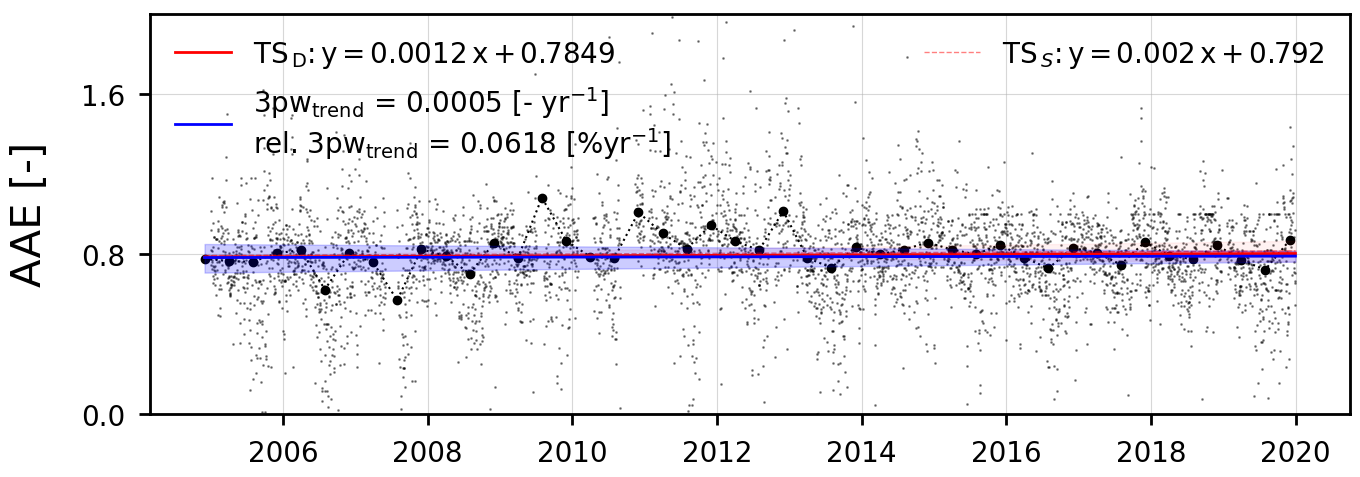

saved as: C:\Users\DominicHeslinRees\Documents\ACP_2023\plots\\FigureS4.png


In [100]:
dict_season_to_ylim = dict(zip(['AHZ', 'SBU', 'SUM', 'all_seasons'], [2, 2, 2, 2]))
fig = full_plot(df, df_seasons, var='AE', ymax2=165, ylabel='AAE', units='[-]', alpha_xhomo=75,
               dict_season_to_ylim=dict_season_to_ylim, sigfigs=4)
fu_trends.save_plot(fig, savepathplots, name='FigureS4', formate='.png')

In [99]:
length = df.index.year[-1] - df.index.year[0] + 1
print('length: '+str(length))

change = 0.0005*length
print("change: "+str(change))

start = 0.7849
end = start - change
print("end: "+str(end))

wavelengths = 525/637

print("start")
print(start)
print("correct by")
print(wavelengths**start)
print("end")
print(end)
print("correct by")
print(wavelengths**end)

print("AE = 1")
print("correct by")
print(wavelengths**1)

print("difference with start compared with 1:")
print(wavelengths**start/wavelengths**1)
print("difference with end compared with 1:")
print(wavelengths**end/wavelengths**1)

length: 15
change: 0.0075
end: 0.7774000000000001
start
0.7849
correct by
0.8591796791955199
end
0.7774000000000001
correct by
0.8604266389861746
AE = 1
correct by
0.8241758241758241
difference with start compared with 1:
1.0424713440905642
difference with end compared with 1:
1.0439843219698919
